In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

from ancilliary_funcs import obtener_descripciones_variables

# warnings.filterwarnings('ignore')
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
df = pd.read_csv('income-db.csv')
df = df.replace('?', np.nan)

# Analisis del vector objetivo (```income```)

1. Ver su cantidad de datos
2. Ver su distribucion graficamente
3. Ver su cantidad de datos faltantes

In [13]:
vector_objetivo = df['income']

In [26]:
def analizar_variable_discreta(serie_variable):
    frecuencias = vector_objetivo.value_counts()
    porcentajes = vector_objetivo.value_counts('%')
    total = pd.DataFrame({'Frecuencia': frecuencias,
                         'Porcentaje': porcentajes}, index=frecuencias.index)
    display(total)

    sns.histplot(vector_objetivo)
    plt.show()
    msno.matrix(pd.DataFrame(vector_objetivo))


,Frecuencia,Porcentaje
<=50K,37155,0.760718
>50K,11687,0.239282


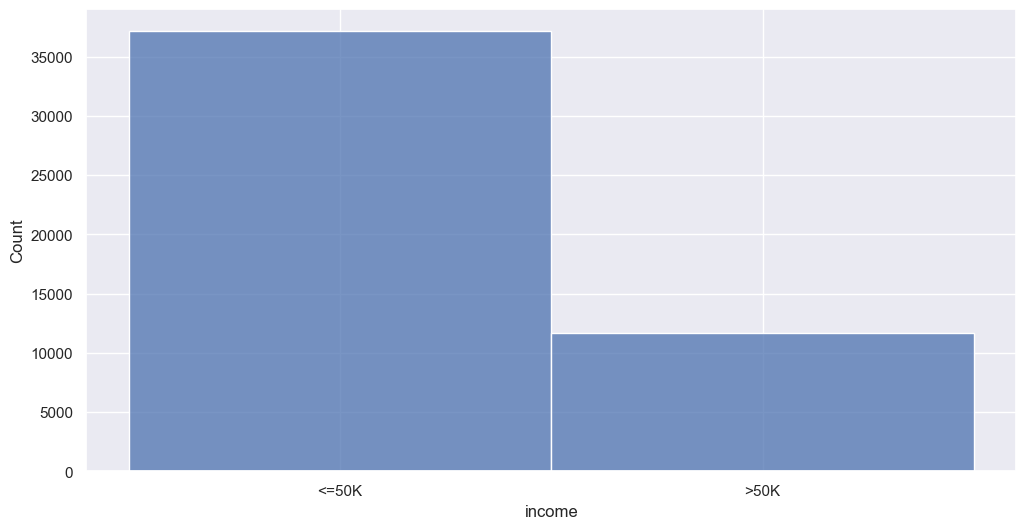

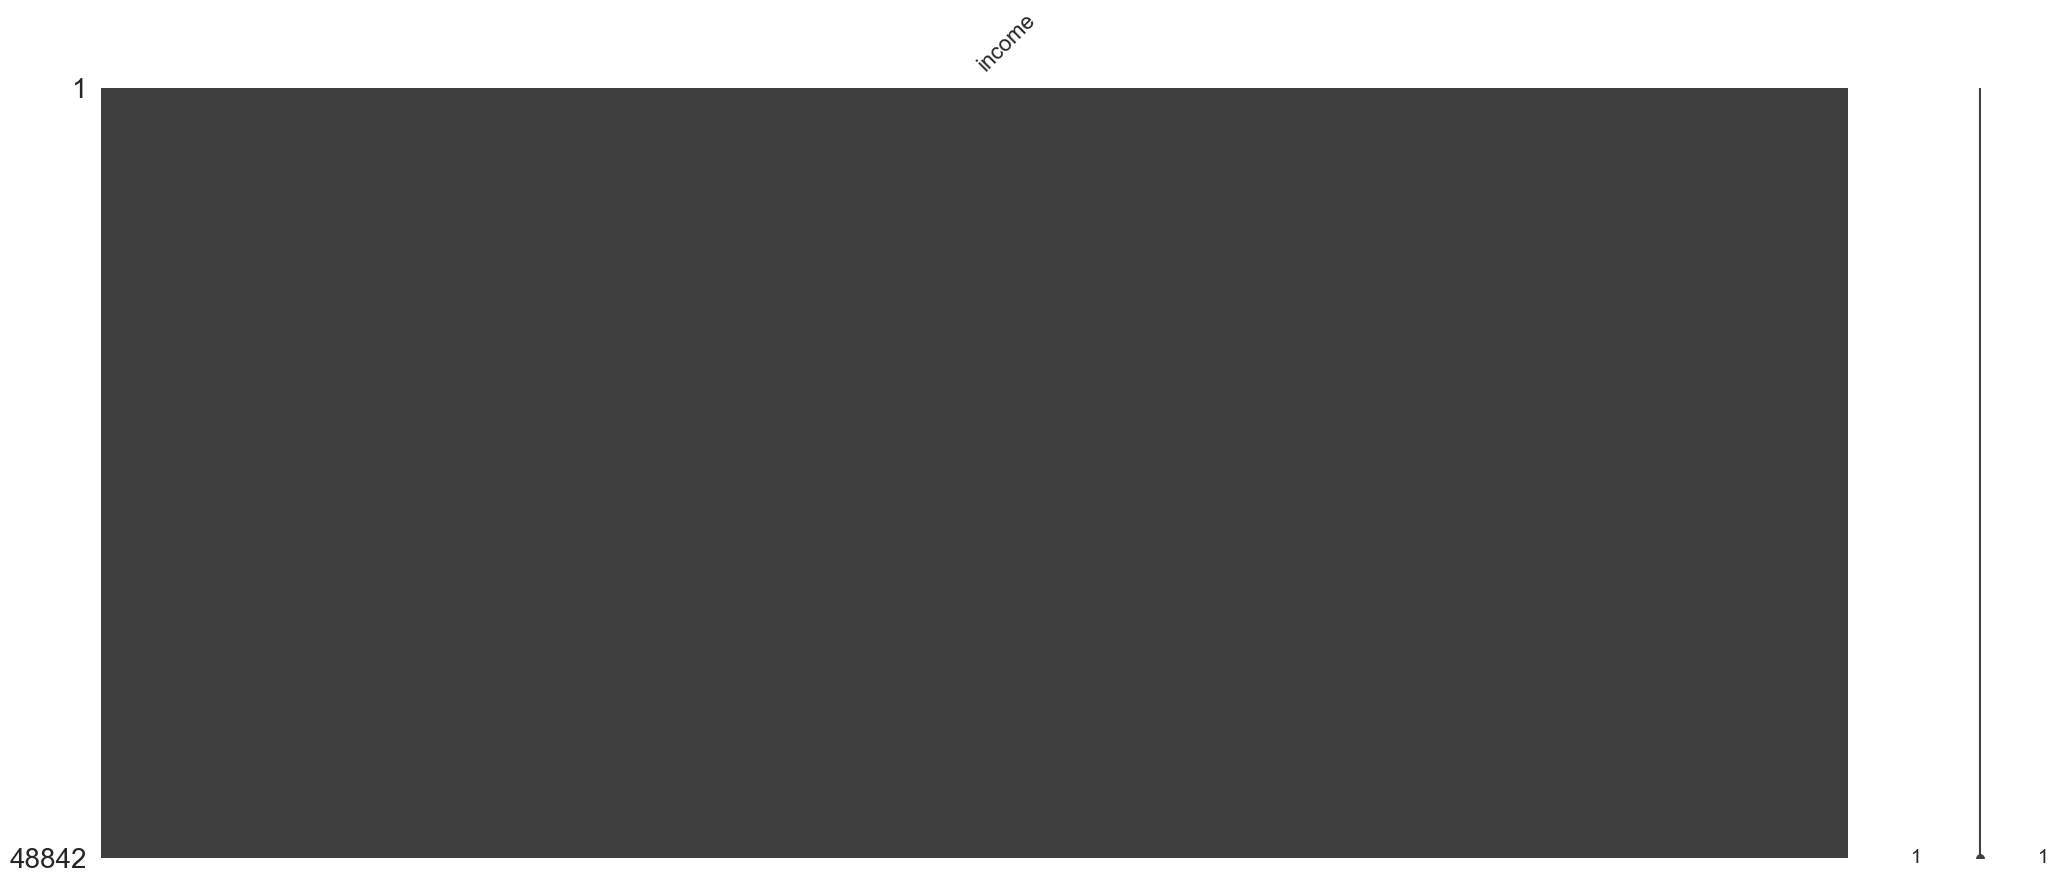

In [27]:
analizar_variable_discreta(vector_objetivo)
# De los resultados se puede ver que existen 37155